# Creation of Cash Flow and Forecasts Dataset

In [1]:
import numpy as np
import pandas as pd

# Set the number of rows and columns
num_rows = 10000
num_columns = 15

# Generate random data
np.random.seed(0)

# Define columns
columns = [
    'Year', 'Branch_ID', 'Region', 'Account_Type', 'Customer_Segment', 'Opening_Balance', 'Deposits', 
    'Withdrawals', 'Closing_Balance', 'Cash_Inflow', 'Cash_Outflow', 'Net_Cash_Flow', 
    'ATM_Transactions', 'Loan_Disbursements', 'Interest_Rates'
]

# Generate synthetic data
data = {
    'Year': np.random.choice(range(2015, 2024), num_rows),  # Years from 2015 to 2023
    'Branch_ID': np.random.randint(1, 50, num_rows),  # Branch IDs
    'Region': np.random.choice(['North', 'South', 'East', 'West'], num_rows),  # Branch regions
    'Account_Type': np.random.choice(['Savings', 'Checking', 'Business', 'Loan'], num_rows),  # Account types
    'Customer_Segment': np.random.choice(['Retail', 'Corporate', 'SME', 'Institutional'], num_rows),  # Customer segments
    'Opening_Balance': np.random.normal(loc=100000, scale=25000, size=num_rows).round(2),  # in USD
    'Deposits': np.random.normal(loc=50000, scale=15000, size=num_rows).round(2),  # in USD
    'Withdrawals': np.random.normal(loc=45000, scale=12000, size=num_rows).round(2),  # in USD
    'Closing_Balance': np.random.normal(loc=100000, scale=25000, size=num_rows).round(2),  # in USD
    'Cash_Inflow': np.random.normal(loc=60000, scale=20000, size=num_rows).round(2),  # in USD
    'Cash_Outflow': np.random.normal(loc=55000, scale=18000, size=num_rows).round(2),  # in USD
    'Net_Cash_Flow': np.random.normal(loc=5000, scale=5000, size=num_rows).round(2),  # in USD
    'ATM_Transactions': np.random.randint(100, 500, num_rows),  # Number of transactions
    'Loan_Disbursements': np.random.normal(loc=30000, scale=10000, size=num_rows).round(2),  # in USD
    'Interest_Rates': np.random.uniform(1, 5, num_rows).round(2)  # in percentage
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Introduce missing values
for col in df.columns:
    if col != 'Year':  # Ensure 'Year' has no missing values
        df.loc[df.sample(frac=0.1).index, col] = np.nan

# Introduce outliers in multiple columns
outliers_indices = np.random.choice(df.index, size=int(num_rows * 0.01), replace=False)
df.loc[outliers_indices, 'Net_Cash_Flow'] = df['Net_Cash_Flow'] * 10
df.loc[outliers_indices, 'Deposits'] = df['Deposits'] * 10
df.loc[outliers_indices, 'Withdrawals'] = df['Withdrawals'] * 10
df.loc[outliers_indices, 'Loan_Disbursements'] = df['Loan_Disbursements'] * 10

# Save the DataFrame to an Excel file
file_path = r"C:\Users\Nidhi mishra\OneDrive\Desktop\CashFlow_Forecasting_Raw_Dataset.xlsx"
df.to_excel(file_path, index=False)

print(f"Dataset saved to {file_path}")


Dataset saved to C:\Users\Nidhi mishra\OneDrive\Desktop\CashFlow_Forecasting_Raw_Dataset.xlsx


## Detecting the dataset

Number of null values in each column:
Year                     0
Branch_ID             1000
Region                1000
Account_Type          1000
Customer_Segment      1000
Opening_Balance       1000
Deposits              1000
Withdrawals           1000
Closing_Balance       1000
Cash_Inflow           1000
Cash_Outflow          1000
Net_Cash_Flow         1000
ATM_Transactions      1000
Loan_Disbursements    1000
Interest_Rates        1000
dtype: int64
Number of outliers in each column:
Year                    0
Branch_ID               0
Opening_Balance        58
Deposits              161
Withdrawals           139
Closing_Balance        95
Cash_Inflow            51
Cash_Outflow           72
Net_Cash_Flow         145
ATM_Transactions        0
Loan_Disbursements    152
Interest_Rates          0
dtype: int64


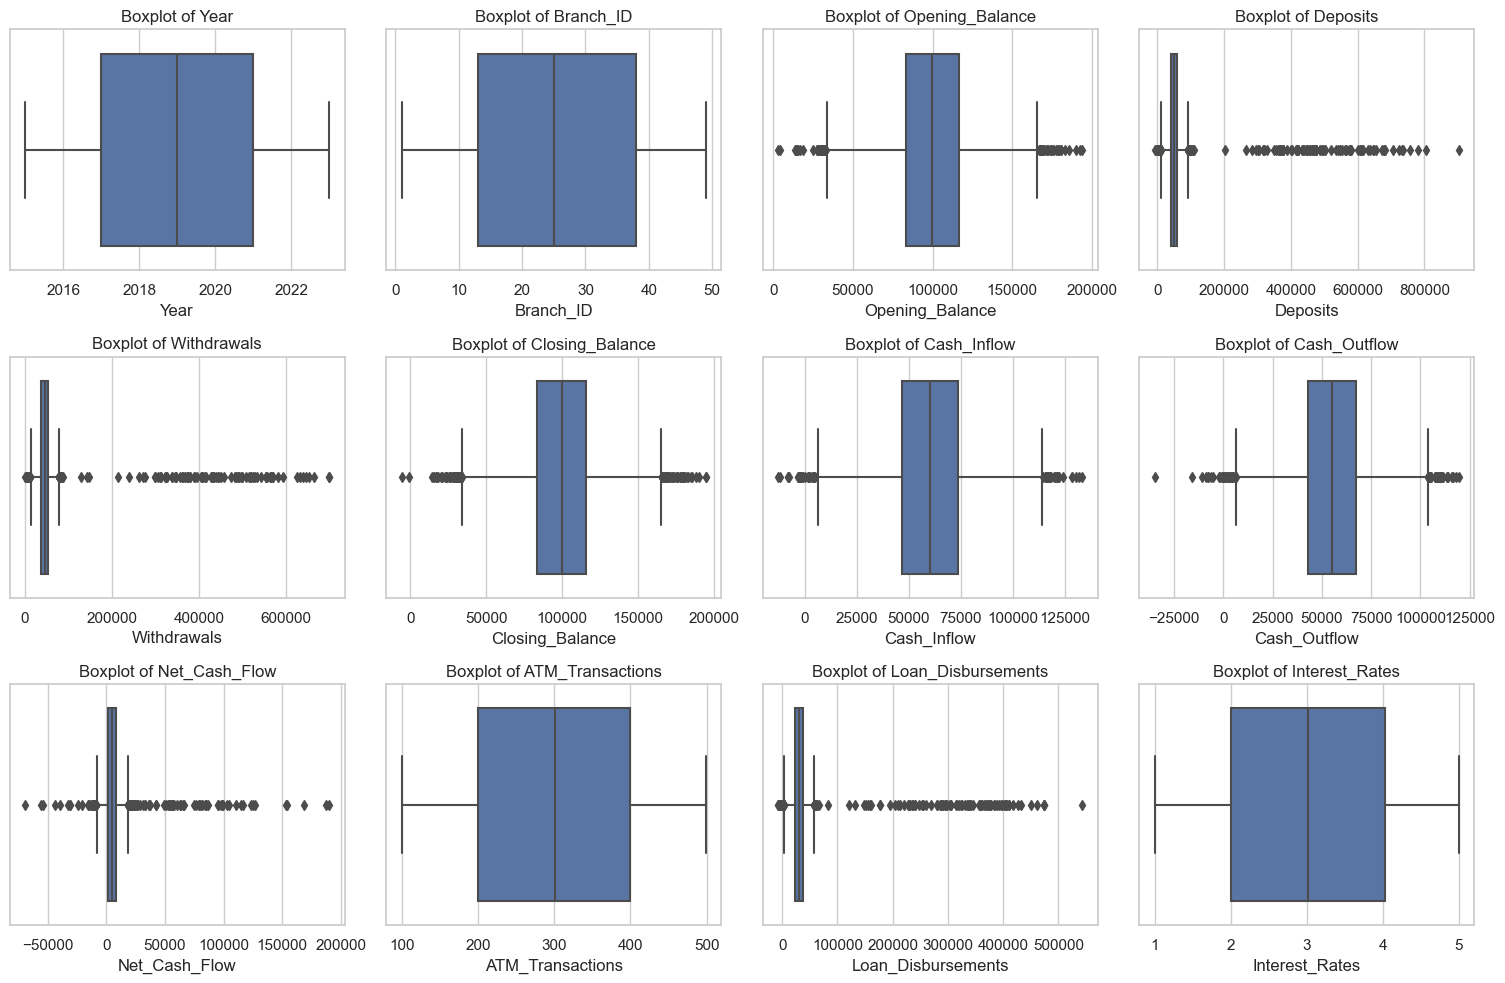

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Detecting the number of null values in each column
null_counts = df.isnull().sum()
print("Number of null values in each column:")
print(null_counts)

# Detecting outliers using the IQR method
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    return outliers

outliers = df.select_dtypes(include=[np.number]).apply(detect_outliers)
outliers_count = outliers.sum()
print("Number of outliers in each column:")
print(outliers_count)

# Setting up the plotting style
sns.set(style="whitegrid")

# Creating boxplots for each numerical column to detect outliers
numerical_columns = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)  # Adjust the grid size based on the number of plots
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


# Creation of ATM Maintenance and Performance Dataset

In [3]:
import numpy as np
import pandas as pd

# Set the number of rows and columns
num_rows = 10000
num_columns = 14

# Generate random data
np.random.seed(0)

# Define columns
columns = [
    'Year', 'ATM_ID', 'Branch_ID', 'Region', 'ATM_Age', 'Last_Maintenance_Date', 'Next_Maintenance_Date',
    'Failure_Rate', 'Transaction_Count', 'Cash_Refill_Amount', 'Downtime', 'Customer_Complaints',
    'Service_Cost', 'Maintenance_Schedule', 'Performance_Rating'
]

# Generate synthetic data
data = {
    'Year': np.random.choice(range(2015, 2024), num_rows),  # Years from 2015 to 2023
    'ATM_ID': np.random.randint(1, 500, num_rows),  # ATM IDs
    'Branch_ID': np.random.randint(1, 50, num_rows),  # Branch IDs
    'Region': np.random.choice(['North', 'South', 'East', 'West'], num_rows),  # Branch regions
    'ATM_Age': np.random.randint(1, 20, num_rows),  # in years
    'Last_Maintenance_Date': pd.to_datetime(np.random.choice(pd.date_range('2023-01-01', '2023-12-31'), num_rows)),  # Dates
    'Next_Maintenance_Date': pd.to_datetime(np.random.choice(pd.date_range('2024-01-01', '2024-12-31'), num_rows)),  # Dates
    'Failure_Rate': np.random.uniform(0, 0.2, num_rows).round(4),  # in percentage
    'Transaction_Count': np.random.randint(100, 5000, num_rows),  # Number of transactions
    'Cash_Refill_Amount': np.random.normal(loc=20000, scale=5000, size=num_rows).round(2),  # in USD
    'Downtime': np.random.normal(loc=2, scale=0.5, size=num_rows).round(2),  # in hours
    'Customer_Complaints': np.random.randint(0, 100, num_rows),  # Number of complaints
    'Service_Cost': np.random.normal(loc=300, scale=100, size=num_rows).round(2),  # in USD
    'Maintenance_Schedule': np.random.choice(['Monthly', 'Quarterly', 'Bi-Annually', 'Annually'], num_rows),  # Schedule
    'Performance_Rating': np.random.choice(['Excellent', 'Good', 'Average', 'Poor'], num_rows)  # Performance categories
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Introduce missing values
for col in df.columns:
    if col != 'Year':  # Ensure 'Year' has no missing values
        df.loc[df.sample(frac=0.1).index, col] = np.nan

# Introduce outliers in multiple columns
outliers_indices = np.random.choice(df.index, size=int(num_rows * 0.01), replace=False)
df.loc[outliers_indices, 'Failure_Rate'] = df['Failure_Rate'] * 10
df.loc[outliers_indices, 'Cash_Refill_Amount'] = df['Cash_Refill_Amount'] * 10
df.loc[outliers_indices, 'Downtime'] = df['Downtime'] * 10
df.loc[outliers_indices, 'Service_Cost'] = df['Service_Cost'] * 10

# Save the DataFrame to an Excel file in a new sheet
file_path = r"C:\Users\Nidhi mishra\OneDrive\Desktop\CashFlow_Forecasting_Raw_Dataset.xlsx"
with pd.ExcelWriter(file_path, mode='a', engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name='Predictive_Maintenance_Raw', index=False)

print(f"Dataset saved to {file_path} in the sheet 'Predictive_Maintenance_Raw'")


Dataset saved to C:\Users\Nidhi mishra\OneDrive\Desktop\CashFlow_Forecasting_Raw_Dataset.xlsx in the sheet 'Predictive_Maintenance_Raw'


## Detecting the dataset

Number of null values in each column:
Year                        0
ATM_ID                   1000
Branch_ID                1000
Region                   1000
ATM_Age                  1000
Last_Maintenance_Date    1000
Next_Maintenance_Date    1000
Failure_Rate             1000
Transaction_Count        1000
Cash_Refill_Amount       1000
Downtime                 1000
Customer_Complaints      1000
Service_Cost             1000
Maintenance_Schedule     1000
Performance_Rating       1000
dtype: int64
Number of outliers in each column:
Year                     0
ATM_ID                   0
Branch_ID                0
ATM_Age                  0
Failure_Rate            67
Transaction_Count        0
Cash_Refill_Amount     147
Downtime               126
Customer_Complaints      0
Service_Cost           157
dtype: int64


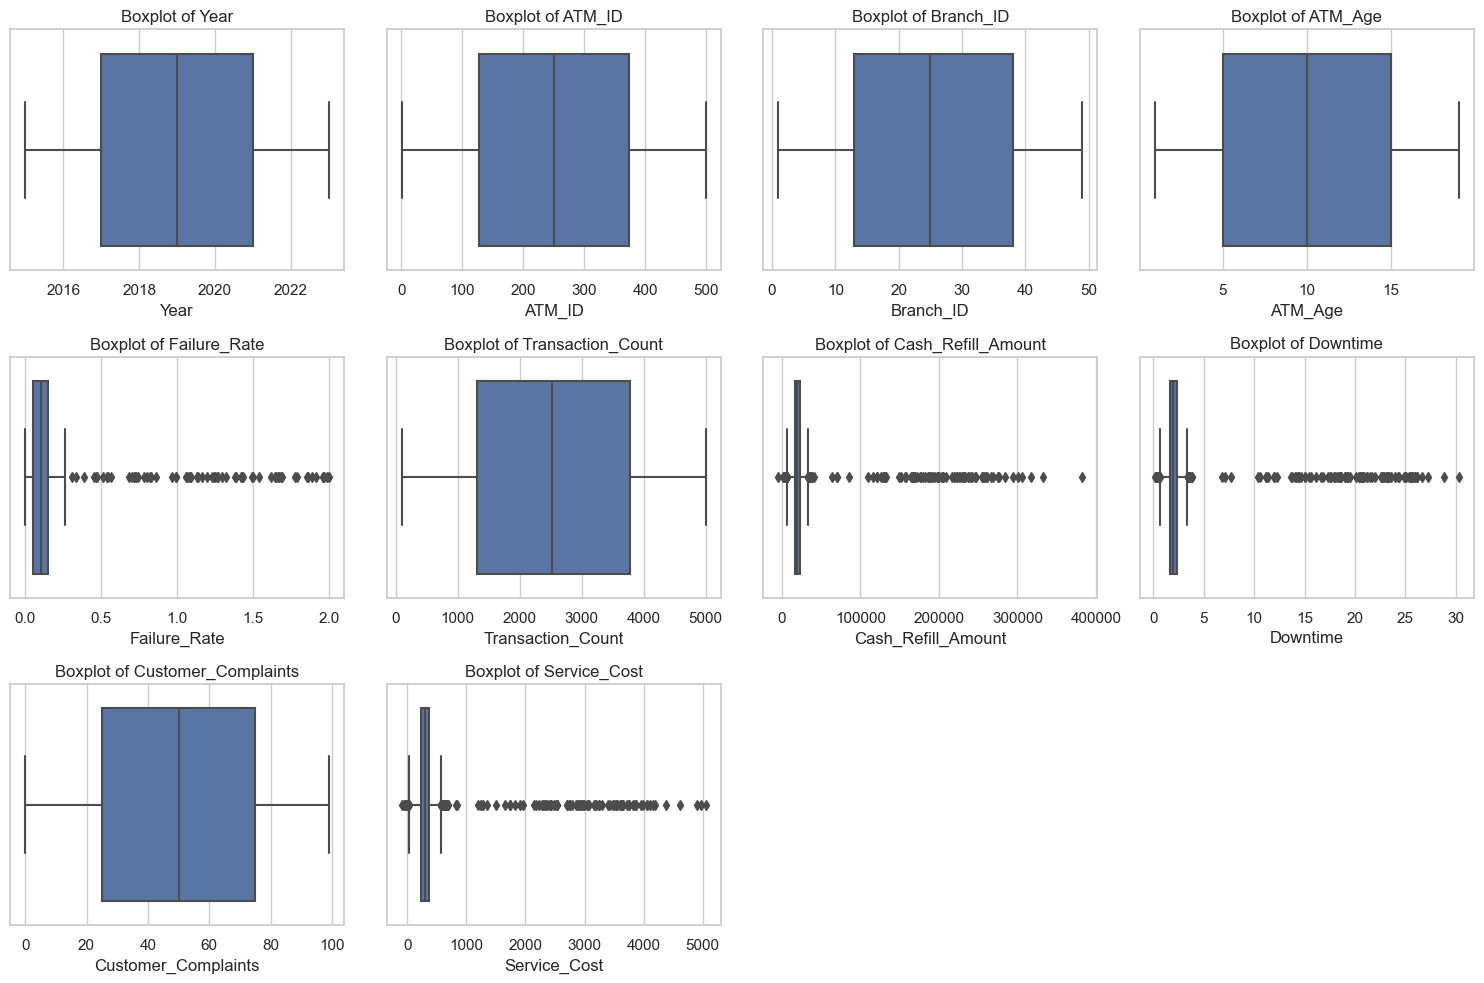

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Detecting the number of null values in each column
null_counts = df.isnull().sum()
print("Number of null values in each column:")
print(null_counts)

# Detecting outliers using the IQR method
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    return outliers

outliers = df.select_dtypes(include=[np.number]).apply(detect_outliers)
outliers_count = outliers.sum()
print("Number of outliers in each column:")
print(outliers_count)

# Setting up the plotting style
sns.set(style="whitegrid")

# Creating boxplots for each numerical column to detect outliers
numerical_columns = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)  # Adjust the grid size based on the number of plots
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


# Creation of Product Performance Dataset

In [5]:
import numpy as np
import pandas as pd

# Set the number of rows and columns
num_rows = 10000
num_columns = 15

# Generate random data
np.random.seed(0)

# Define columns
columns = [
    'Year', 'Product_ID', 'Product_Name', 'Category', 'Launch_Date', 'Sales', 'Returns', 'Customer_Ratings', 
    'Stock_Level', 'Discount_Rate', 'Revenue', 'Profit', 'Market_Share', 'Customer_Complaints', 'Advertising_Cost'
]

# Generate synthetic data
data = {
    'Year': np.random.choice(range(2015, 2024), num_rows),  # Years from 2015 to 2023
    'Product_ID': np.random.randint(1, 1000, num_rows),  # Product IDs
    'Product_Name': np.random.choice(['Product_A', 'Product_B', 'Product_C', 'Product_D'], num_rows),  # Product names
    'Category': np.random.choice(['Electronics', 'Furniture', 'Clothing', 'Food'], num_rows),  # Product categories
    'Launch_Date': pd.to_datetime(np.random.choice(pd.date_range('2015-01-01', '2023-12-31'), num_rows)),  # Launch dates
    'Sales': np.random.randint(100, 10000, num_rows),  # Number of sales
    'Returns': np.random.randint(0, 500, num_rows),  # Number of returns
    'Customer_Ratings': np.random.uniform(1, 5, num_rows).round(2),  # Ratings out of 5
    'Stock_Level': np.random.randint(0, 2000, num_rows),  # Stock levels
    'Discount_Rate': np.random.uniform(0, 50, num_rows).round(2),  # Discount rates in percentage
    'Revenue': np.random.normal(loc=50000, scale=20000, size=num_rows).round(2),  # Revenue in USD
    'Profit': np.random.normal(loc=10000, scale=5000, size=num_rows).round(2),  # Profit in USD
    'Market_Share': np.random.uniform(0, 100, num_rows).round(2),  # Market share in percentage
    'Customer_Complaints': np.random.randint(0, 100, num_rows),  # Number of complaints
    'Advertising_Cost': np.random.normal(loc=5000, scale=2000, size=num_rows).round(2)  # Advertising cost in USD
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Introduce missing values
for col in df.columns:
    if col != 'Year':  # Ensure 'Year' has no missing values
        df.loc[df.sample(frac=0.1).index, col] = np.nan

# Introduce outliers in multiple columns
outliers_indices = np.random.choice(df.index, size=int(num_rows * 0.01), replace=False)
df.loc[outliers_indices, 'Sales'] = df['Sales'] * 10
df.loc[outliers_indices, 'Returns'] = df['Returns'] * 10
df.loc[outliers_indices, 'Revenue'] = df['Revenue'] * 10
df.loc[outliers_indices, 'Profit'] = df['Profit'] * 10

# Save the DataFrame to an Excel file in a new sheet
file_path = r"C:\Users\Nidhi mishra\OneDrive\Desktop\CashFlow_Forecasting_Raw_Dataset.xlsx"
with pd.ExcelWriter(file_path, mode='a', engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name='Product_Performance_Raw', index=False)

print(f"Dataset saved to {file_path} in the sheet 'Product_Performance_Raw'")


Dataset saved to C:\Users\Nidhi mishra\OneDrive\Desktop\CashFlow_Forecasting_Raw_Dataset.xlsx in the sheet 'Product_Performance_Raw'


## Detecting the dataset

Number of null values in each column:
Year                      0
Product_ID             1000
Product_Name           1000
Category               1000
Launch_Date            1000
Sales                  1000
Returns                1000
Customer_Ratings       1000
Stock_Level            1000
Discount_Rate          1000
Revenue                1000
Profit                 1000
Market_Share           1000
Customer_Complaints    1000
Advertising_Cost       1000
dtype: int64
Number of outliers in each column:
Year                     0
Product_ID               0
Sales                   78
Returns                 67
Customer_Ratings         0
Stock_Level              0
Discount_Rate            0
Revenue                147
Profit                 141
Market_Share             0
Customer_Complaints      0
Advertising_Cost        71
dtype: int64


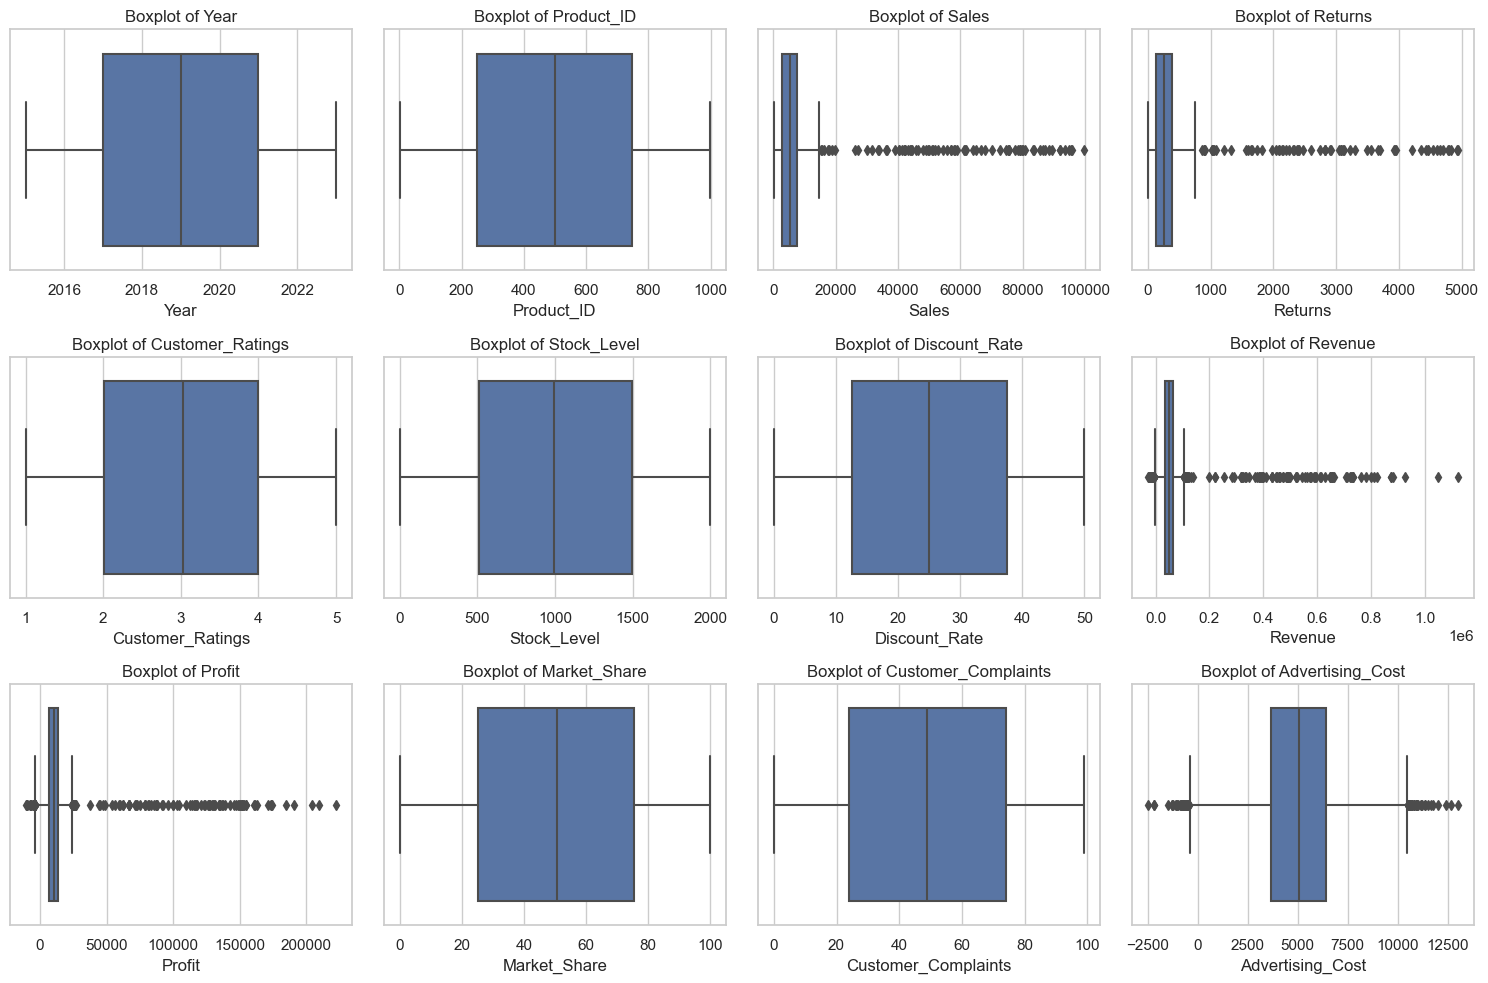

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Detecting the number of null values in each column
null_counts = df.isnull().sum()
print("Number of null values in each column:")
print(null_counts)

# Detecting outliers using the IQR method
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    return outliers

outliers = df.select_dtypes(include=[np.number]).apply(detect_outliers)
outliers_count = outliers.sum()
print("Number of outliers in each column:")
print(outliers_count)

# Setting up the plotting style
sns.set(style="whitegrid")

# Creating boxplots for each numerical column to detect outliers
numerical_columns = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)  # Adjust the grid size based on the number of plots
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


# Creation of Operational Efficiency Dataset

In [7]:
import numpy as np
import pandas as pd

# Set the number of rows and columns
num_rows = 10000
num_columns = 15

# Generate random data
np.random.seed(0)

# Define columns
columns = [
    'Year', 'Department_ID', 'Department_Name', 'Employee_Count', 'Operational_Cost', 'Revenue', 
    'Productivity_Score', 'Customer_Satisfaction', 'Service_Delivery_Time', 'Error_Rate', 'Training_Hours',
    'Operational_Incident_Count', 'Equipment_Downtime', 'Cost_Savings', 'Compliance_Score'
]

# Generate synthetic data
data = {
    'Year': np.random.choice(range(2015, 2024), num_rows),  # Years from 2015 to 2023
    'Department_ID': np.random.randint(1, 100, num_rows),  # Department IDs
    'Department_Name': np.random.choice(['Finance', 'HR', 'IT', 'Operations', 'Sales'], num_rows),  # Department names
    'Employee_Count': np.random.randint(10, 500, num_rows),  # Number of employees
    'Operational_Cost': np.random.normal(loc=50000, scale=15000, size=num_rows).round(2),  # in USD
    'Revenue': np.random.normal(loc=100000, scale=30000, size=num_rows).round(2),  # in USD
    'Productivity_Score': np.random.uniform(0, 100, num_rows).round(2),  # Productivity score out of 100
    'Customer_Satisfaction': np.random.uniform(0, 10, num_rows).round(2),  # Satisfaction score out of 10
    'Service_Delivery_Time': np.random.normal(loc=3, scale=1, size=num_rows).round(2),  # in hours
    'Error_Rate': np.random.uniform(0, 0.1, num_rows).round(4),  # Error rate in percentage
    'Training_Hours': np.random.normal(loc=20, scale=5, size=num_rows).round(2),  # Training hours
    'Operational_Incident_Count': np.random.randint(0, 50, num_rows),  # Number of incidents
    'Equipment_Downtime': np.random.normal(loc=5, scale=2, size=num_rows).round(2),  # Downtime in hours
    'Cost_Savings': np.random.normal(loc=10000, scale=5000, size=num_rows).round(2),  # Cost savings in USD
    'Compliance_Score': np.random.uniform(0, 100, num_rows).round(2)  # Compliance score out of 100
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Introduce missing values
for col in df.columns:
    if col != 'Year':  # Ensure 'Year' has no missing values
        df.loc[df.sample(frac=0.1).index, col] = np.nan

# Introduce outliers in multiple columns
outliers_indices = np.random.choice(df.index, size=int(num_rows * 0.01), replace=False)
df.loc[outliers_indices, 'Operational_Cost'] = df['Operational_Cost'] * 10
df.loc[outliers_indices, 'Revenue'] = df['Revenue'] * 10
df.loc[outliers_indices, 'Service_Delivery_Time'] = df['Service_Delivery_Time'] * 10
df.loc[outliers_indices, 'Equipment_Downtime'] = df['Equipment_Downtime'] * 10

# Save the DataFrame to an Excel file in a new sheet
file_path = r"C:\Users\Nidhi mishra\OneDrive\Desktop\CashFlow_Forecasting_Raw_Dataset.xlsx"
with pd.ExcelWriter(file_path, mode='a', engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name='Operational_Metrics_Raw', index=False)

print(f"Dataset saved to {file_path} in the sheet 'Operational_Metrics_Raw'")


Dataset saved to C:\Users\Nidhi mishra\OneDrive\Desktop\CashFlow_Forecasting_Raw_Dataset.xlsx in the sheet 'Operational_Metrics_Raw'


## Detecting the dataset

Number of null values in each column:
Year                             0
Department_ID                 1000
Department_Name               1000
Employee_Count                1000
Operational_Cost              1000
Revenue                       1000
Productivity_Score            1000
Customer_Satisfaction         1000
Service_Delivery_Time         1000
Error_Rate                    1000
Training_Hours                1000
Operational_Incident_Count    1000
Equipment_Downtime            1000
Cost_Savings                  1000
Compliance_Score              1000
dtype: int64
Number of outliers in each column:
Year                            0
Department_ID                   0
Employee_Count                  0
Operational_Cost              148
Revenue                       152
Productivity_Score              0
Customer_Satisfaction           0
Service_Delivery_Time         143
Error_Rate                      0
Training_Hours                 72
Operational_Incident_Count      0
Equipment_Downt

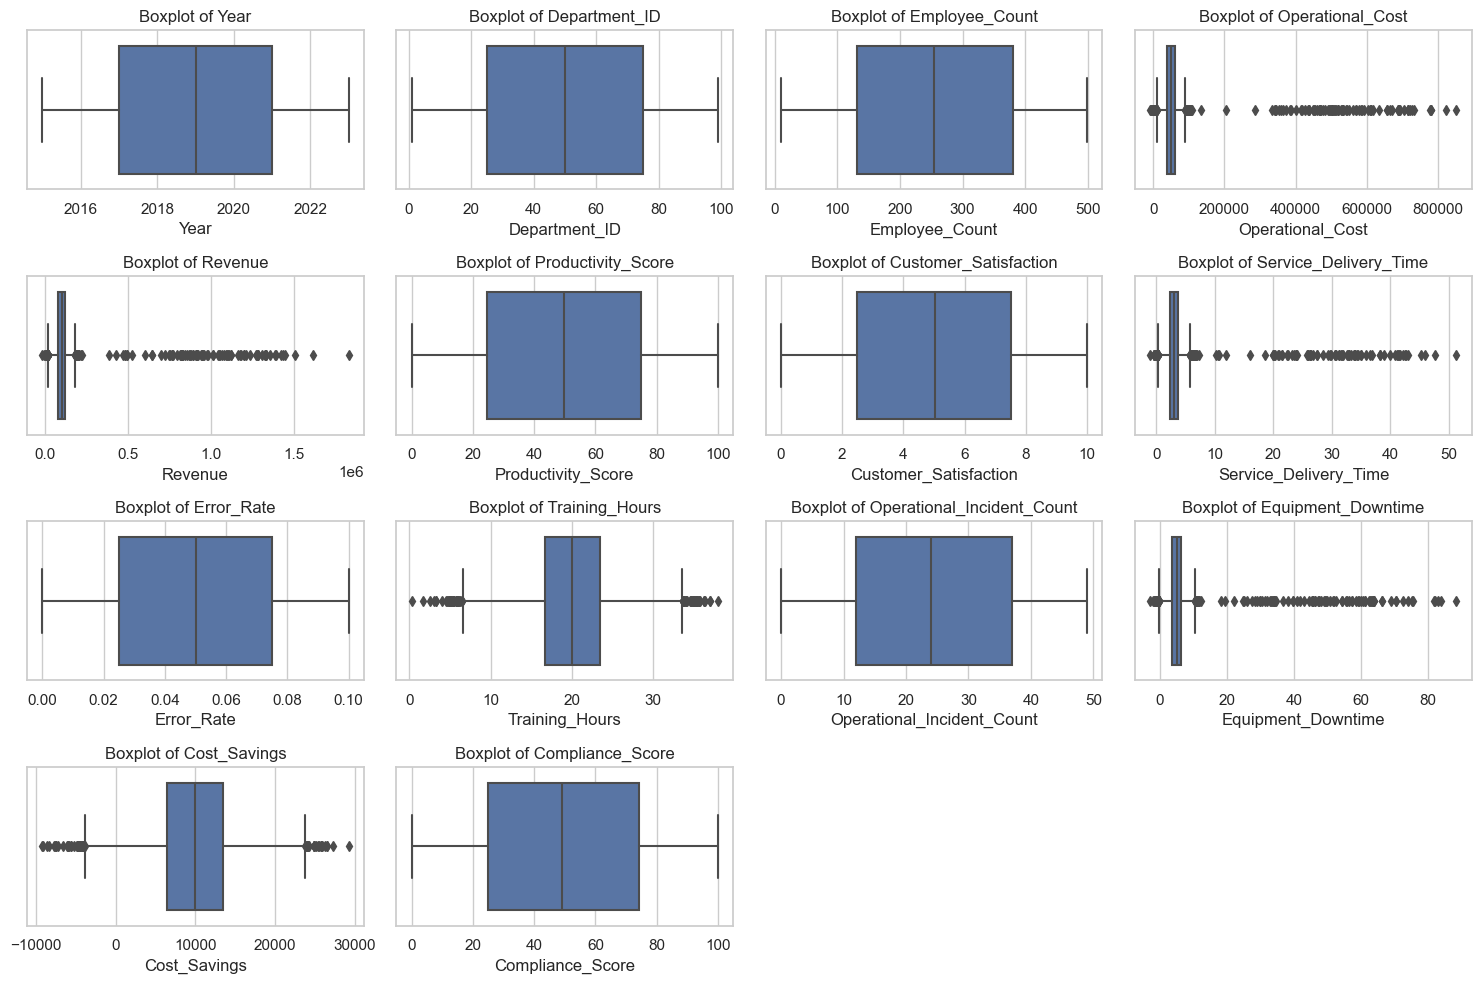

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Detecting the number of null values in each column
null_counts = df.isnull().sum()
print("Number of null values in each column:")
print(null_counts)

# Detecting outliers using the IQR method
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    return outliers

# Apply outlier detection to numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
outliers = df[numerical_columns].apply(detect_outliers)
outliers_count = outliers.sum()
print("Number of outliers in each column:")
print(outliers_count)

# Setting up the plotting style
sns.set(style="whitegrid")

# Creating boxplots for each numerical column to detect outliers
plt.figure(figsize=(15, 10))

# Adjust the number of rows and columns in the grid based on the number of numerical columns
num_plots = len(numerical_columns)
n_rows = (num_plots + 3) // 4  # Number of rows needed in the subplot grid

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, 4, i)  # Adjust the grid size based on the number of plots
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()
